In [4]:
import pandas as pd

news_df = pd.read_csv('bc_wildfire_news.csv')
reddit_df = pd.read_csv('reddit_clean.csv')

In [5]:
news_time_series = news_df.copy()
news_time_series['time'] = pd.to_datetime(news_time_series['created_at'], unit='s')
news_daily_counts = news_time_series.groupby(news_time_series['time'].dt.date).size()
news_daily_counts.head()

time
2022-08-11    1
2022-08-12    1
2022-08-13    1
2022-08-14    2
2022-08-15    1
dtype: int64

In [7]:
reddit_time_series = reddit_df.copy()
reddit_time_series['time'] = pd.to_datetime(reddit_time_series['created_utc'], unit='s')
reddit_daily_counts = reddit_time_series.groupby(reddit_time_series['time'].dt.date).size()
reddit_daily_counts.head()

time
2022-09-25    2
2022-09-26    2
2022-09-27    7
2022-09-28    7
2022-09-29    6
dtype: int64

In [8]:
news_daily_counts_max = news_daily_counts.max()
news_daily_counts_min = news_daily_counts.min()
normalized_news_daily_counts = (news_daily_counts - news_daily_counts_min) / (news_daily_counts_max - news_daily_counts_min)

reddit_daily_counts_max = reddit_daily_counts.max()
reddit_daily_counts_min = reddit_daily_counts.min()
normalized_reddit_daily_counts = (reddit_daily_counts - reddit_daily_counts_min) / (reddit_daily_counts_max - reddit_daily_counts_min)

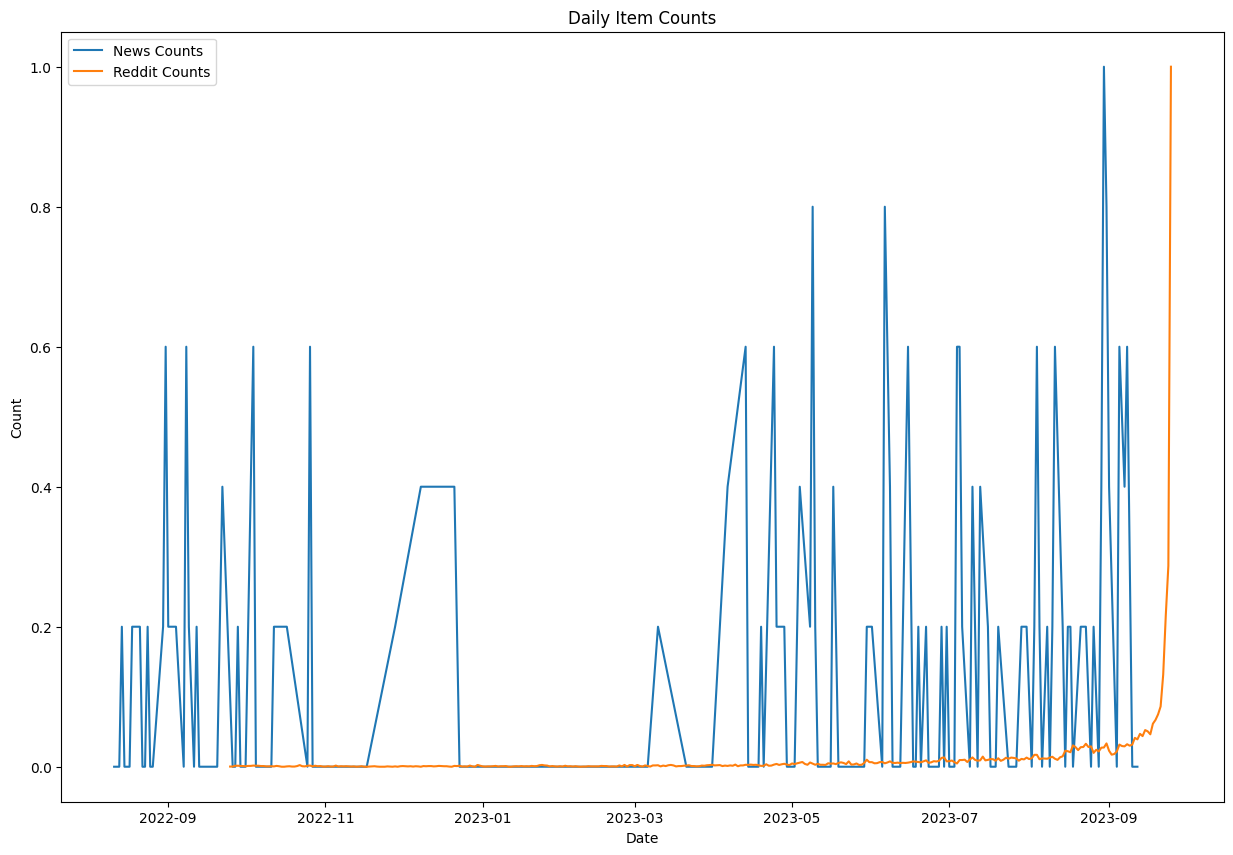

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))

normalized_news_daily_counts.plot(ax=ax, label='News Counts')
normalized_reddit_daily_counts.plot(ax=ax, label='Reddit Counts')

ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Daily Item Counts')
ax.legend()

plt.show()